# CSV Visualization in Python and the Jupyter Notebook

Import the libraries we need

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

Define the filename

In [2]:
str_filename = 'test_001_000.csv'

Open the file and instantiate the csv reader

In [3]:
fh = open(str_filename)
csv_reader = csv.reader(fh)

Read in the header labels

In [4]:
csv_header = next(csv_reader)
csv_header

['X', 'CH1', 'CH2']

Read in the dates

In [5]:
lst_dt_csv = next(csv_reader)
lst_dt_csv

['Date and Time',
 '2021-12-09 05:36:10.782-08:00',
 '2021-12-09 05:36:10.782-08:00']

In [6]:
dt_csv = np.array(list(map(datetime.fromisoformat, lst_dt_csv[1:3])))
dt_csv

array([datetime.datetime(2021, 12, 9, 5, 36, 10, 782000, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=57600))),
       datetime.datetime(2021, 12, 9, 5, 36, 10, 782000, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=57600)))],
      dtype=object)

Read in the sampling frequency

In [7]:
lst_fs = next(csv_reader)
np_d_fs = np.array(list(map(float, lst_fs[1:3])))
np_d_fs

array([1305.625068, 1305.625068])

Close the file

In [8]:
fh.close()

Read in the data frame

In [9]:
df_sig = pd.read_csv(str_filename, header=None, skiprows=5, names=csv_header)
df_sig

,X,CH1,CH2
0,0,0.05,-0.024
1,1,0.02,0.048
2,2,0.02,-0.008
3,3,0.06,0.064
4,4,0.02,0.136
...,...,...,...
1195,1195,-0.01,-0.112
1196,1196,0.00,-0.024
1197,1197,0.04,-0.080
1198,1198,-0.01,-0.008


Display the signal in channel 1

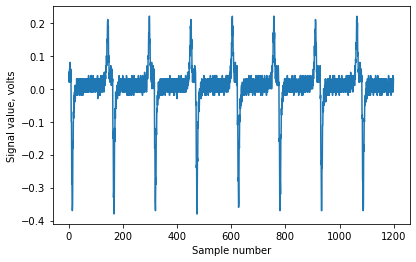

In [10]:
df_sig.CH1.plot()
plt.xlabel('Sample number')
plt.ylabel('Signal value, volts')

figure = plt.gcf()
figure.set_size_inches(4*1.6, 4)
plt.savefig('CSV Visualization.pdf')